# Weather Data EDA Analysis
## Exploratory Data Analysis for Weather and Environmental Features

This notebook analyzes the cleaned weather data to understand environmental patterns and their potential impact on product demand.

In [24]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("viridis")
pd.set_option('display.max_columns', None)

In [25]:
# Load the cleaned weather data
df = pd.read_csv("../data/processed/weather_data_cleaned.csv")

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

Dataset shape: (3660, 4)
Columns: ['location', 'date', 'temp(c)', 'rainfall(mm)']


,location,date,temp(c),rainfall(mm)
0,L01,2024-01-01,14.4,0.9
1,L01,2024-01-02,10.4,1.5
2,L01,2024-01-03,12.4,7.9
3,L01,2024-01-04,17.8,23.5
4,L01,2024-01-05,15.0,5.6


In [26]:
# Basic information about the dataset
print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nUnique Values:")
print(df.nunique())

DATASET OVERVIEW
Shape: (3660, 4)
Memory usage: 0.44 MB

Data Types:
location         object
date             object
temp(c)         float64
rainfall(mm)    float64
dtype: object

Missing Values:
location        0
date            0
temp(c)         0
rainfall(mm)    0
dtype: int64

Unique Values:
location         10
date            366
temp(c)         382
rainfall(mm)    494
dtype: int64


In [27]:
# Display basic statistics
df.describe(include='all')

,location,date,temp(c),rainfall(mm)
count,3660,3660,3660.000000,3660.000000
unique,10,366,NaN,NaN
top,L01,2024-01-01,NaN,NaN
freq,366,10,NaN,NaN
mean,NaN,NaN,25.840437,10.391421
std,NaN,NaN,8.553408,14.857652
min,NaN,NaN,5.000000,0.000000
25%,NaN,NaN,19.600000,2.100000
50%,NaN,NaN,26.500000,5.200000
75%,NaN,NaN,32.400000,12.100000


## Temperature Analysis

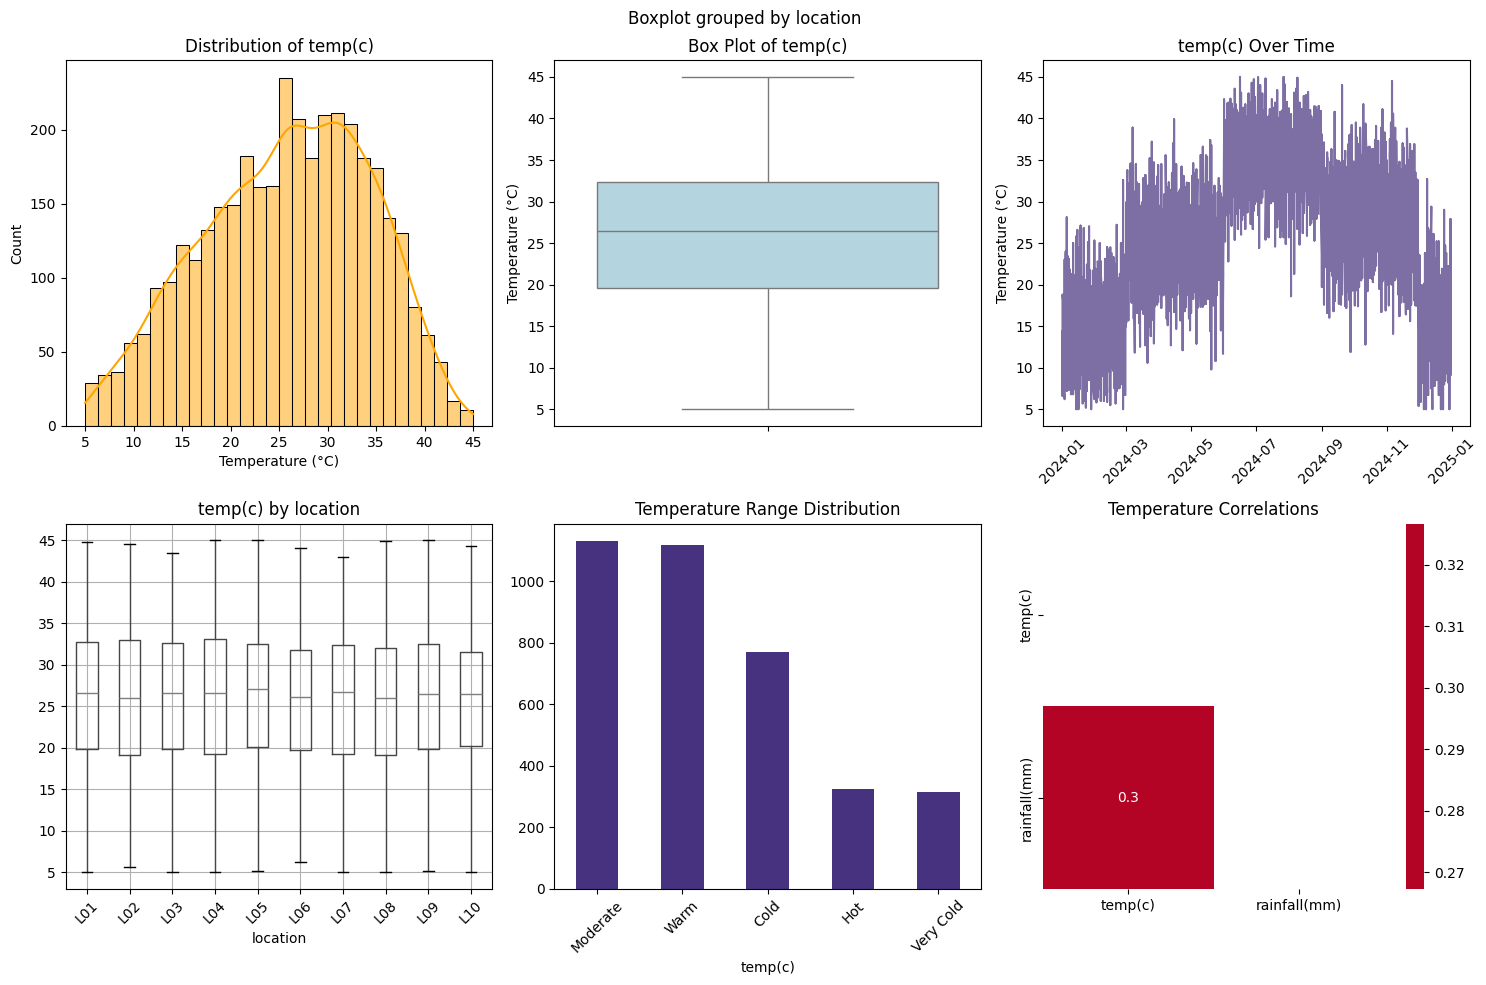


🌡️ TEMPERATURE STATISTICS for temp(c):
   Mean: 25.84°C
   Median: 26.50°C
   Std Dev: 8.55°C
   Min: 5.00°C
   Max: 45.00°C
   Range: 40.00°C


In [28]:
# Temperature analysis
temp_columns = [col for col in df.columns if 'temp' in col.lower() or 'temperature' in col.lower()]

if temp_columns:
    temp_col = temp_columns[0]  # Use the first temperature column found
    
    plt.figure(figsize=(15, 10))
    
    # Temperature distribution
    plt.subplot(2, 3, 1)
    sns.histplot(df[temp_col], bins=30, kde=True, color='orange')
    plt.title(f'Distribution of {temp_col}')
    plt.xlabel('Temperature (°C)')
    
    # Temperature box plot
    plt.subplot(2, 3, 2)
    sns.boxplot(y=df[temp_col], color='lightblue')
    plt.title(f'Box Plot of {temp_col}')
    plt.ylabel('Temperature (°C)')
    
    # Temperature over time (if date column exists)
    if 'Date' in df.columns or 'date' in df.columns:
        date_col = 'Date' if 'Date' in df.columns else 'date'
        df[date_col] = pd.to_datetime(df[date_col])
        
        plt.subplot(2, 3, 3)
        df_sorted = df.sort_values(date_col)
        plt.plot(df_sorted[date_col], df_sorted[temp_col], alpha=0.7)
        plt.title(f'{temp_col} Over Time')
        plt.xticks(rotation=45)
        plt.ylabel('Temperature (°C)')
    
    # Temperature by location (if location column exists)
    location_cols = [col for col in df.columns if 'location' in col.lower()]
    if location_cols:
        location_col = location_cols[0]
        plt.subplot(2, 3, 4)
        df.boxplot(column=temp_col, by=location_col, ax=plt.gca())
        plt.title(f'{temp_col} by {location_col}')
        plt.xticks(rotation=45)
    
    # Temperature statistics by ranges
    plt.subplot(2, 3, 5)
    temp_ranges = pd.cut(df[temp_col], bins=5, labels=['Very Cold', 'Cold', 'Moderate', 'Warm', 'Hot'])
    temp_ranges.value_counts().plot(kind='bar')
    plt.title('Temperature Range Distribution')
    plt.xticks(rotation=45)
    
    # Temperature correlation with other numeric columns
    plt.subplot(2, 3, 6)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        correlation_matrix = df[numeric_cols].corr()
        mask = np.zeros_like(correlation_matrix, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0)
        plt.title('Temperature Correlations')
    
    plt.tight_layout()
    plt.show()
    
    # Print temperature statistics
    print(f"\n🌡️ TEMPERATURE STATISTICS for {temp_col}:")
    print(f"   Mean: {df[temp_col].mean():.2f}°C")
    print(f"   Median: {df[temp_col].median():.2f}°C")
    print(f"   Std Dev: {df[temp_col].std():.2f}°C")
    print(f"   Min: {df[temp_col].min():.2f}°C")
    print(f"   Max: {df[temp_col].max():.2f}°C")
    print(f"   Range: {df[temp_col].max() - df[temp_col].min():.2f}°C")

## Rainfall Analysis

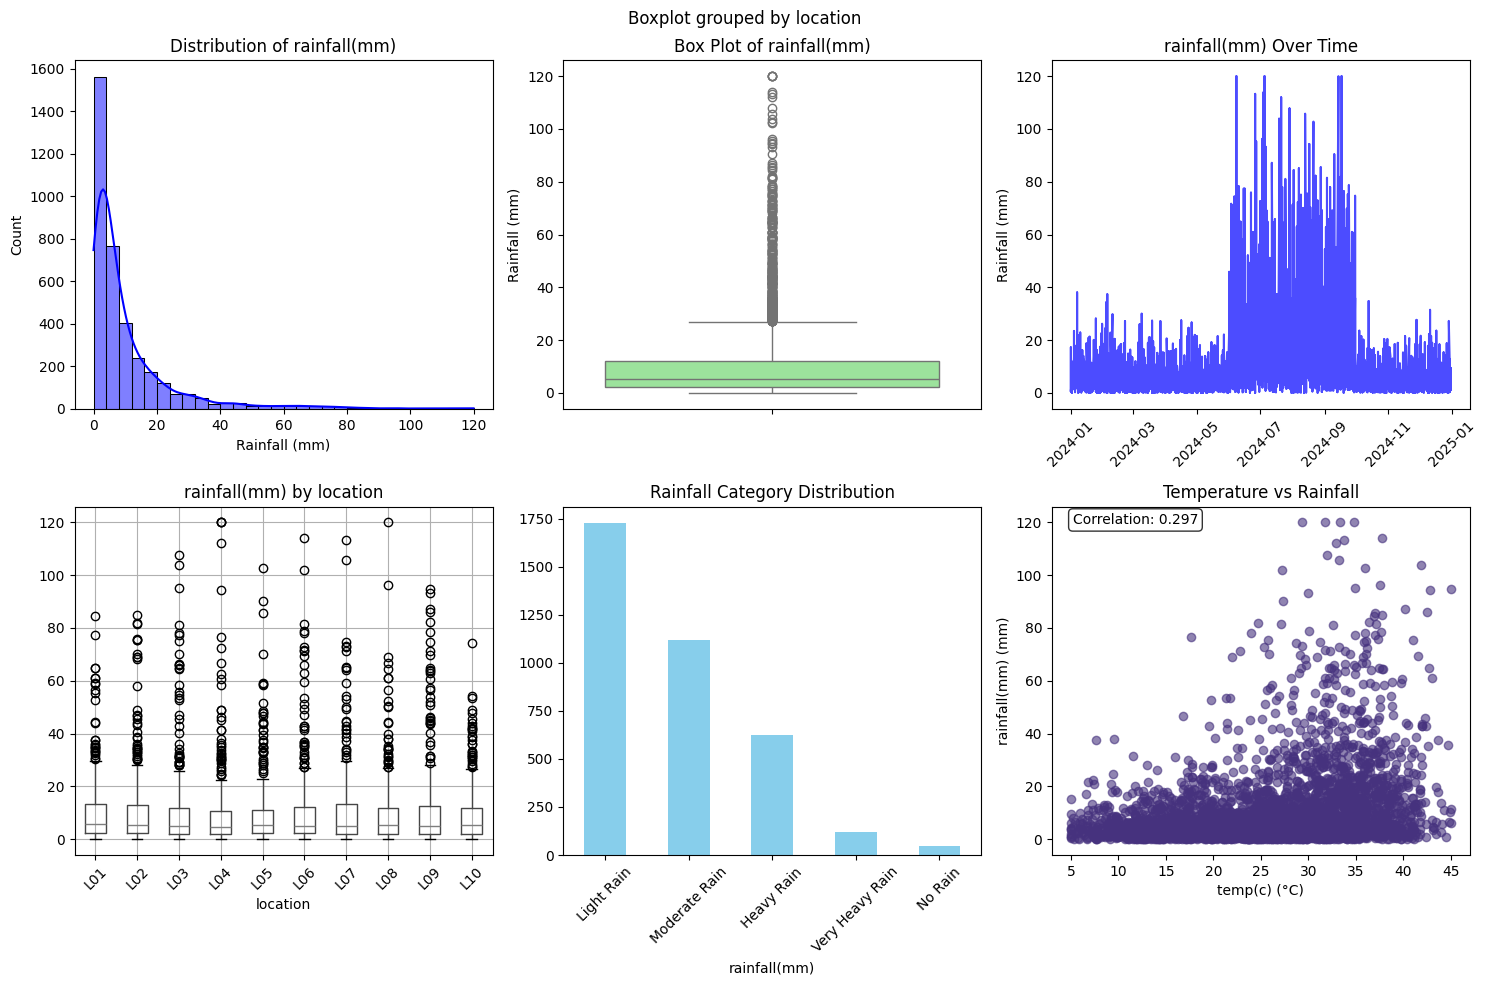


🌧️ RAINFALL STATISTICS for rainfall(mm):
   Mean: 10.39 mm
   Median: 5.20 mm
   Std Dev: 14.86 mm
   Min: 0.00 mm
   Max: 120.00 mm
   Days with no rain: 26 (0.7%)
   Rainy days: 3634 (99.3%)


In [29]:
# Rainfall analysis
rainfall_columns = [col for col in df.columns if 'rain' in col.lower() or 'precipitation' in col.lower()]

if rainfall_columns:
    rain_col = rainfall_columns[0]  # Use the first rainfall column found
    
    plt.figure(figsize=(15, 10))
    
    # Rainfall distribution
    plt.subplot(2, 3, 1)
    sns.histplot(df[rain_col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {rain_col}')
    plt.xlabel('Rainfall (mm)')
    
    # Rainfall box plot
    plt.subplot(2, 3, 2)
    sns.boxplot(y=df[rain_col], color='lightgreen')
    plt.title(f'Box Plot of {rain_col}')
    plt.ylabel('Rainfall (mm)')
    
    # Rainfall over time (if date column exists)
    if 'Date' in df.columns or 'date' in df.columns:
        date_col = 'Date' if 'Date' in df.columns else 'date'
        
        plt.subplot(2, 3, 3)
        df_sorted = df.sort_values(date_col)
        plt.plot(df_sorted[date_col], df_sorted[rain_col], alpha=0.7, color='blue')
        plt.title(f'{rain_col} Over Time')
        plt.xticks(rotation=45)
        plt.ylabel('Rainfall (mm)')
    
    # Rainfall by location (if location column exists)
    location_cols = [col for col in df.columns if 'location' in col.lower()]
    if location_cols:
        location_col = location_cols[0]
        plt.subplot(2, 3, 4)
        df.boxplot(column=rain_col, by=location_col, ax=plt.gca())
        plt.title(f'{rain_col} by {location_col}')
        plt.xticks(rotation=45)
    
    # Rainfall categories
    plt.subplot(2, 3, 5)
    rain_categories = ['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain', 'Very Heavy Rain']
    rain_ranges = pd.cut(df[rain_col], bins=[0, 0.1, 5, 15, 50, float('inf')], labels=rain_categories)
    rain_ranges.value_counts().plot(kind='bar', color='skyblue')
    plt.title('Rainfall Category Distribution')
    plt.xticks(rotation=45)
    
    # Rainfall vs Temperature scatter plot
    if temp_columns:
        plt.subplot(2, 3, 6)
        plt.scatter(df[temp_col], df[rain_col], alpha=0.6)
        plt.xlabel(f'{temp_col} (°C)')
        plt.ylabel(f'{rain_col} (mm)')
        plt.title('Temperature vs Rainfall')
        
        # Add correlation coefficient
        correlation = df[temp_col].corr(df[rain_col])
        plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
                transform=plt.gca().transAxes, fontsize=10, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print rainfall statistics
    print(f"\n🌧️ RAINFALL STATISTICS for {rain_col}:")
    print(f"   Mean: {df[rain_col].mean():.2f} mm")
    print(f"   Median: {df[rain_col].median():.2f} mm")
    print(f"   Std Dev: {df[rain_col].std():.2f} mm")
    print(f"   Min: {df[rain_col].min():.2f} mm")
    print(f"   Max: {df[rain_col].max():.2f} mm")
    print(f"   Days with no rain: {(df[rain_col] == 0).sum()} ({(df[rain_col] == 0).mean()*100:.1f}%)")
    print(f"   Rainy days: {(df[rain_col] > 0).sum()} ({(df[rain_col] > 0).mean()*100:.1f}%)")

## Interactive Weather Visualizations

In [30]:
# Interactive temperature and rainfall time series
if temp_columns and rainfall_columns and ('Date' in df.columns or 'date' in df.columns):
    date_col = 'Date' if 'Date' in df.columns else 'date'
    
    fig = go.Figure()
    
    # Add temperature trace
    fig.add_trace(go.Scatter(
        x=df[date_col],
        y=df[temp_col],
        mode='lines',
        name='Temperature (°C)',
        line=dict(color='red', width=2),
        yaxis='y'
    ))
    
    # Add rainfall trace on secondary y-axis
    fig.add_trace(go.Scatter(
        x=df[date_col],
        y=df[rain_col],
        mode='lines',
        name='Rainfall (mm)',
        line=dict(color='blue', width=2),
        yaxis='y2'
    ))
    
    # Update layout
    fig.update_layout(
        title='Temperature and Rainfall Over Time',
        xaxis_title='Date',
        yaxis=dict(
            title='Temperature (°C)',
            side='left',
            color='red'
        ),
        yaxis2=dict(
            title='Rainfall (mm)',
            side='right',
            overlaying='y',
            color='blue'
        ),
        hovermode='x unified'
    )
    
    fig.show()

In [31]:
# Weather patterns by location (if location data exists)
location_cols = [col for col in df.columns if 'location' in col.lower()]

if location_cols and temp_columns and rainfall_columns:
    location_col = location_cols[0]
    
    # Create subplot for each location
    locations = df[location_col].unique()
    
    if len(locations) <= 10:  # Only create if reasonable number of locations
        fig = px.box(
            df, 
            x=location_col, 
            y=temp_col,
            title='Temperature Distribution by Location',
            color=location_col
        )
        fig.show()
        
        fig2 = px.box(
            df, 
            x=location_col, 
            y=rain_col,
            title='Rainfall Distribution by Location',
            color=location_col
        )
        fig2.show()

## Weather Impact Analysis

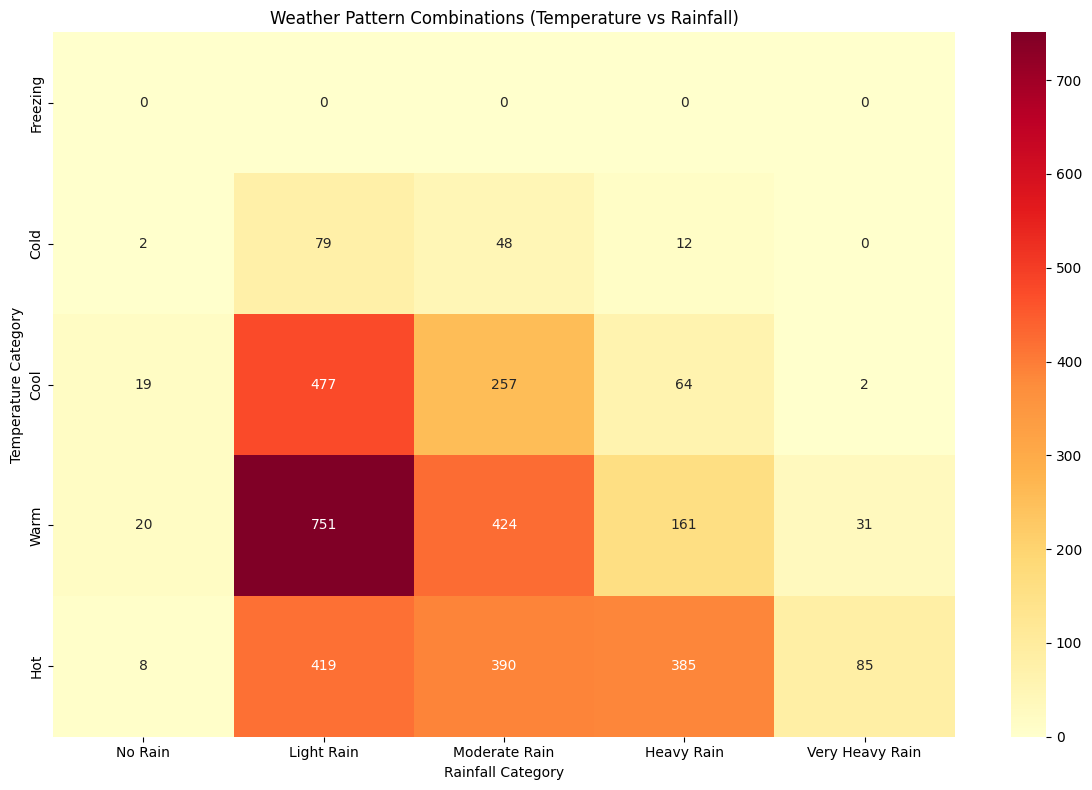


🌤️ WEATHER PATTERN ANALYSIS:

Temperature Categories:
   Warm: 1398 days (38.2%)
   Hot: 1292 days (35.3%)
   Cool: 825 days (22.5%)
   Cold: 145 days (4.0%)
   Freezing: 0 days (0.0%)

Rainfall Categories:
   Light Rain: 1726 days (47.2%)
   Moderate Rain: 1119 days (30.6%)
   Heavy Rain: 622 days (17.0%)
   Very Heavy Rain: 118 days (3.2%)
   No Rain: 49 days (1.3%)


In [32]:
# Create weather categories for analysis
if temp_columns and rainfall_columns:
    # Temperature categories
    temp_bins = [-float('inf'), 0, 10, 20, 30, float('inf')]
    temp_labels = ['Freezing', 'Cold', 'Cool', 'Warm', 'Hot']
    df['temp_category'] = pd.cut(df[temp_col], bins=temp_bins, labels=temp_labels)
    
    # Rainfall categories
    rain_bins = [0, 0.1, 5, 15, 50, float('inf')]
    rain_labels = ['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain', 'Very Heavy Rain']
    df['rain_category'] = pd.cut(df[rain_col], bins=rain_bins, labels=rain_labels)
    
    # Weather combination analysis
    weather_combo = df.groupby(['temp_category', 'rain_category']).size().unstack(fill_value=0)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(weather_combo, annot=True, fmt='d', cmap='YlOrRd')
    plt.title('Weather Pattern Combinations (Temperature vs Rainfall)')
    plt.xlabel('Rainfall Category')
    plt.ylabel('Temperature Category')
    plt.tight_layout()
    plt.show()
    
    print("\n🌤️ WEATHER PATTERN ANALYSIS:")
    print("\nTemperature Categories:")
    temp_dist = df['temp_category'].value_counts()
    for category, count in temp_dist.items():
        print(f"   {category}: {count} days ({count/len(df)*100:.1f}%)")
    
    print("\nRainfall Categories:")
    rain_dist = df['rain_category'].value_counts()
    for category, count in rain_dist.items():
        print(f"   {category}: {count} days ({count/len(df)*100:.1f}%)")

## Summary and Insights

In [33]:
# Summary insights
print("=" * 60)
print("WEATHER DATA INSIGHTS")
print("=" * 60)

if temp_columns:
    print(f"\n🌡️ TEMPERATURE INSIGHTS:")
    print(f"   Average temperature: {df[temp_col].mean():.1f}°C")
    print(f"   Temperature range: {df[temp_col].min():.1f}°C to {df[temp_col].max():.1f}°C")
    
    # Find most common temperature range
    if 'temp_category' in df.columns:
        most_common_temp = df['temp_category'].mode().iloc[0]
        print(f"   Most common condition: {most_common_temp}")

if rainfall_columns:
    print(f"\n🌧️ RAINFALL INSIGHTS:")
    print(f"   Average rainfall: {df[rain_col].mean():.1f} mm")
    print(f"   Rainy days: {(df[rain_col] > 0).sum()}/{len(df)} ({(df[rain_col] > 0).mean()*100:.1f}%)")
    print(f"   Dry days: {(df[rain_col] == 0).sum()}/{len(df)} ({(df[rain_col] == 0).mean()*100:.1f}%)")
    
    if 'rain_category' in df.columns:
        most_common_rain = df['rain_category'].mode().iloc[0]
        print(f"   Most common condition: {most_common_rain}")

# Correlation analysis
if temp_columns and rainfall_columns:
    correlation = df[temp_col].corr(df[rain_col])
    print(f"\n🔗 CORRELATION ANALYSIS:")
    print(f"   Temperature-Rainfall correlation: {correlation:.3f}")
    if correlation > 0.3:
        print("   → Strong positive correlation: higher temperatures with more rain")
    elif correlation < -0.3:
        print("   → Strong negative correlation: higher temperatures with less rain")
    else:
        print("   → Weak correlation between temperature and rainfall")

# Location analysis
location_cols = [col for col in df.columns if 'location' in col.lower()]
if location_cols:
    location_col = location_cols[0]
    unique_locations = df[location_col].nunique()
    print(f"\n📍 LOCATION ANALYSIS:")
    print(f"   Number of locations: {unique_locations}")
    
    if temp_columns:
        temp_by_location = df.groupby(location_col)[temp_col].mean().sort_values(ascending=False)
        print(f"   Warmest location: {temp_by_location.index[0]} ({temp_by_location.iloc[0]:.1f}°C)")
        print(f"   Coolest location: {temp_by_location.index[-1]} ({temp_by_location.iloc[-1]:.1f}°C)")
    
    if rainfall_columns:
        rain_by_location = df.groupby(location_col)[rain_col].mean().sort_values(ascending=False)
        print(f"   Wettest location: {rain_by_location.index[0]} ({rain_by_location.iloc[0]:.1f} mm)")
        print(f"   Driest location: {rain_by_location.index[-1]} ({rain_by_location.iloc[-1]:.1f} mm)")

print("\n" + "="*60)

WEATHER DATA INSIGHTS

🌡️ TEMPERATURE INSIGHTS:
   Average temperature: 25.8°C
   Temperature range: 5.0°C to 45.0°C
   Most common condition: Warm

🌧️ RAINFALL INSIGHTS:
   Average rainfall: 10.4 mm
   Rainy days: 3634/3660 (99.3%)
   Dry days: 26/3660 (0.7%)
   Most common condition: Light Rain

🔗 CORRELATION ANALYSIS:
   Temperature-Rainfall correlation: 0.297
   → Weak correlation between temperature and rainfall

📍 LOCATION ANALYSIS:
   Number of locations: 10
   Warmest location: L01 (26.2°C)
   Coolest location: L06 (25.4°C)
   Wettest location: L09 (11.2 mm)
   Driest location: L10 (9.2 mm)



In [34]:
# Data quality assessment
print("WEATHER DATA QUALITY ASSESSMENT")
print("=" * 40)

# Check for missing values
missing_data = df.isnull().sum()
if missing_data.sum() == 0:
    print("✅ No missing values found")
else:
    print("⚠️ Missing values detected:")
    for col, missing in missing_data[missing_data > 0].items():
        print(f"   {col}: {missing} ({missing/len(df)*100:.1f}%)")

# Check for anomalies
print("\n🔍 ANOMALY DETECTION:")

if temp_columns:
    temp_outliers = df[temp_col][(df[temp_col] < df[temp_col].quantile(0.01)) | 
                                (df[temp_col] > df[temp_col].quantile(0.99))]
    print(f"   Temperature outliers: {len(temp_outliers)} ({len(temp_outliers)/len(df)*100:.1f}%)")

if rainfall_columns:
    rain_outliers = df[rain_col][df[rain_col] > df[rain_col].quantile(0.99)]
    print(f"   Rainfall outliers: {len(rain_outliers)} ({len(rain_outliers)/len(df)*100:.1f}%)")

# Check data consistency
print("\n📊 DATA CONSISTENCY:")
for col in df.columns:
    if df[col].dtype == 'object':
        unique_count = df[col].nunique()
        print(f"   {col}: {unique_count} unique values")
        if unique_count <= 10:
            print(f"      Values: {list(df[col].unique())}")

WEATHER DATA QUALITY ASSESSMENT
⚠️ Missing values detected:
   rain_category: 26 (0.7%)

🔍 ANOMALY DETECTION:
   Temperature outliers: 71 (1.9%)
   Rainfall outliers: 37 (1.0%)

📊 DATA CONSISTENCY:
   location: 10 unique values
      Values: ['L01', 'L02', 'L03', 'L04', 'L05', 'L06', 'L07', 'L08', 'L09', 'L10']
